## TP 2 - Premiers algorithmes de classification

Dans ce TP nous allons explorer plusieurs algorithmes supervisés de classification. 
On rappele que la classification supervisée consiste à apprendre à classer un vecteur d'entrée $\mathbf{x_i} \in \mathbb{R}^d$ et à lui associer un label (une valeur entière) $y_i$. Pour réaliser cet apprentissage, les classifieurs vont apprendre leurs paramètres par optimisation (généralement via une descente de gradient) afin de minimiser leurs erreurs de prédiction. 

On note généralement $f(\mathbf{x}_i,\mathbf{w})$ le résultat de la prédiction faite par le classifieur $f$ avec les paramètres $\mathbf{w}$ pour le vecteur d'entrée à classer $\mathbf{x}_i$.

Nous allons explorer plusieurs algorithmes de classification dans ce TP : la classification logistique, la classification Bayésienne, les k plus proches voisins. Nous verrons également comment réaliser l'apprentissage avec des ensembles d'apprentissage et de test et comment évaluer les performances.



Importez les librairies de base dont nous aurons besoin, comme au TP précédent:

In [43]:
# import des outils mathématiques
import numpy as np

# import des outils d'affichage
import matplotlib.pyplot as plt

# import des outils de machine learning
import sklearn as skl
import sklearn.datasets as data

Classification logistique
--------

La classification logistique binaire est un algorithme de classification utilisé pour estimer la probabilité qu'une donnée appartienne à une classe particulière.

Un modèle de régression logistique calcule une somme pondérée des caractéristiques d'entrée (plus un terme de biais), puis applique la fonction logistique à cette somme afin d'obtenir une probabilité.

La prédiction de probabilité est obtenue par $f(\mathbf{w},\mathbf{x}_i)=\sigma(\mathbf{w}^T\mathbf{x})$ avec $\sigma(x)=\frac{1}{1+e^{-x}}$ la fonction logistique.

La classification peut ensuite se faire en deux classes avec la règle suivante :

$y=\left\{  \begin{array}{ll}0&\text{Si }\sigma(\mathbf{w}^T\mathbf{x})\leq 0.5\\1&\text{Si }\sigma(\mathbf{w}^T\mathbf{x})> 0.5\end{array}\right.$

Nous allons commencer par générer un dataset synthétique qui va nous servir pour expérimenter la classification logistique. Tout comme dans le TP précédent, nous allons utiliser la fonction `make_classification` de la classe `datasets` importée ci-dessus sous le nom *data* (voir la documentation à
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html ).

En vous aidant de la documentation, générez un problème de classification binaire de 1000 points avec:
- deux attributs ($x$ aura deux dimensions),
- deux dimensions informatives,
- aucun attribut redondant
- un cluster par classe
- `random_state` à 26

Les données générées (instances et labels) seront stockées dans deux tableaux nommés x et y. Affichez ces données à l'aide d'une fonction nommée `plot_data` prenant x et y en paramètres. Mettez une couleur différente par classe.

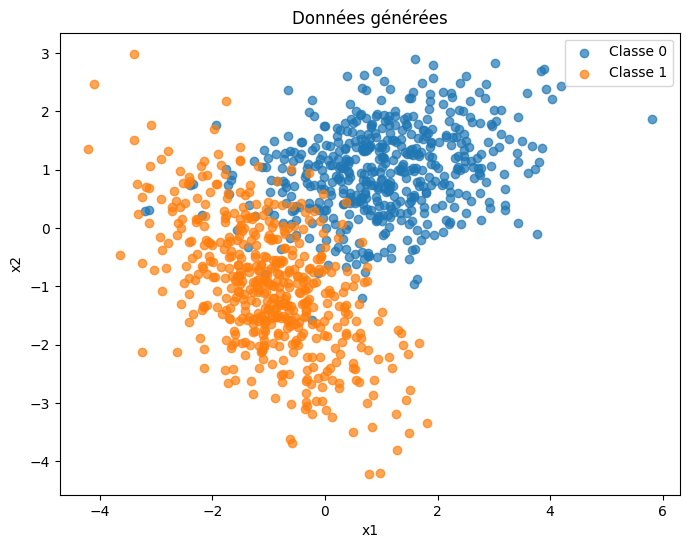

In [44]:
# Génération du dataset synthétique
x, y = data.make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=26
)

# Fonction d'affichage des données
def plot_data(x, y):
    plt.figure(figsize=(8, 6))
    for label in np.unique(y):
        plt.scatter(x[y == label, 0], x[y == label, 1], label=f'Classe {label}', alpha=0.7)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Données générées')
    plt.show()

plot_data(x, y)

Sur le dataset généré appliquez le classifieur `LogisticRegression()` (documentation à https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). L'usage est le même que dans le TP précédent avec `LinearRegression()` avec `fit` pour réaliser l'apprentissage et `predict` pour effectuer une classification. Faites un apprentissage sur les données x et testez sur celles-ci. Affichez le vecteur résultat de la prédiction.

In [45]:
from sklearn.linear_model import LogisticRegression

# Création et apprentissage du classifieur logistique
log_classification = LogisticRegression()
log_classification.fit(x, y)

# Prédiction sur les données d'apprentissage
y_pred = log_classification.predict(x)
print(y_pred)

[1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1
 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0
 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0
 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1
 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 

Afin de savoir si le modèle classe correctement les données d'apprentissage, il faut l'évaluer. Utilisez la fonction `classification_report` (documentation à https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) pour afficher les performances du classifieur. Interprétez les résultats affichés.

In [46]:
from sklearn.metrics import classification_report

# Affichage du rapport de classification
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       502
           1       0.94      0.95      0.94       498

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



Affichons maintenant la frontière de décision que le classifieur logistique utilise. Comme le vecteur d'entrée est en 2D, la frontière de prédiction est une droite. On peut récupérer les paramètres estimés pour celle-ci dans les attributs `coef_` (coefficients de la droite) et `intercept_` (le biais). Affichez les. Ecrivez ensuite une fonction nommée `plot_decision(x, y, log_classification)` avec `log_classification` le classifier logistique. Cette fonction doit afficher une figure avec les données (avec une couleur correspondant à leur classe prédite) ainsi que la frontière de décision. Note: `coef_` et `intercept_` fournissent les coefficient $w_1, w_2$ et $w_0$ de la frontière de séparation qui a pour équation $w_1 x_1 + w_2 x_2 + w_0=0$. Il vous faudra exprimer $x_2$ en fonction de $x_1$ pour effectuer le plot de la frontière de décision.

Voici un exemple de rendu à obtenir :

![](./image1_TP2.png "Classification logistique").

Coefficients (coef_): [[-2.07570801 -2.52910795]]
Biais (intercept_): [-0.63346336]


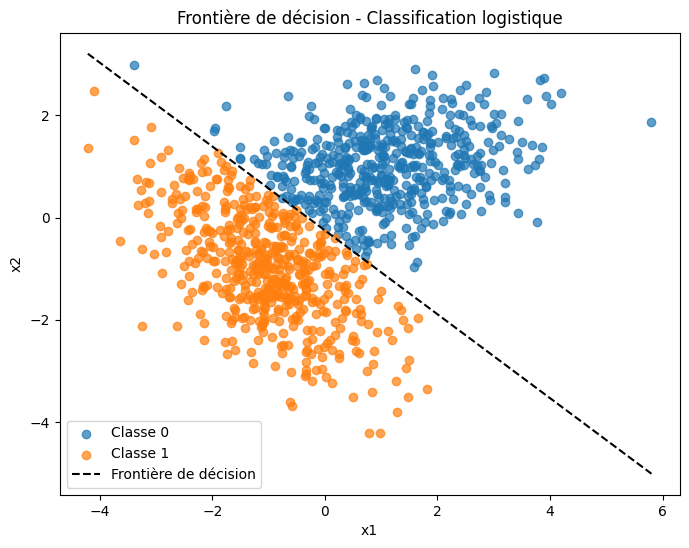

In [47]:
# Affichage des coefficients et du biais
print("Coefficients (coef_):", log_classification.coef_)
print("Biais (intercept_):", log_classification.intercept_)

def plot_decision(x, y, log_classification):
    plt.figure(figsize=(8, 6))
    # Prédire les classes pour colorer les points
    y_pred = log_classification.predict(x)
    for label in np.unique(y_pred):
        plt.scatter(x[y_pred == label, 0], x[y_pred == label, 1], label=f'Classe {label}', alpha=0.7)
    # Tracer la frontière de décision
    w1, w2 = log_classification.coef_[0]
    w0 = log_classification.intercept_[0]
    x1_vals = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    x2_vals = -(w1 * x1_vals + w0) / w2
    plt.plot(x1_vals, x2_vals, 'k--', label='Frontière de décision')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Frontière de décision - Classification logistique')
    plt.show()

plot_decision(x, y, log_classification)

Vous avez pu constater que le modèle fonctionne bien, mais il est testé sur les données sur lesquelles il a appris et cela biaise son évaluation qui est trop optimiste. Il faut donc que l'on divise nos données en deux sous ensembles : un pour l'apprentissage et un pour le test. Celui pour le test sera indépendant car il n'aura pas été vu durant l'apprentissage. L'évaluation du modèle sur celui-ci sera donc plus objective.

Pour répartir automatiquement les données de x et y dans des sous-ensembles d'apprentissage (x_train, y_train) (75% des données) et de test (x_test, y_test) (25% des données) , utilisez la fonction `train_test_split` (documentation à https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Refaites l'apprentissage, affichez les scores (precision/recall/...) pour ces deux modèles, et affichez (avec votre fonction  `plot_decision`) deux figures pour la classification de chacun des deux ensembles. Comparez les deux performances. On peut avoir juste la performance avec `sklearn.metrics.accuracy_score`


Scores sur l'ensemble d'apprentissage :
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       382
           1       0.93      0.94      0.94       368

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

Accuracy (train): 0.936
Scores sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       120
           1       0.96      0.99      0.97       130

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

Accuracy (test): 0.972


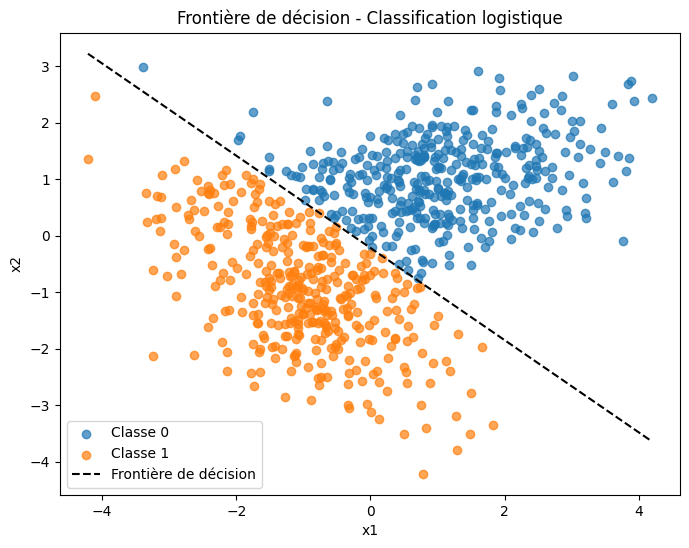

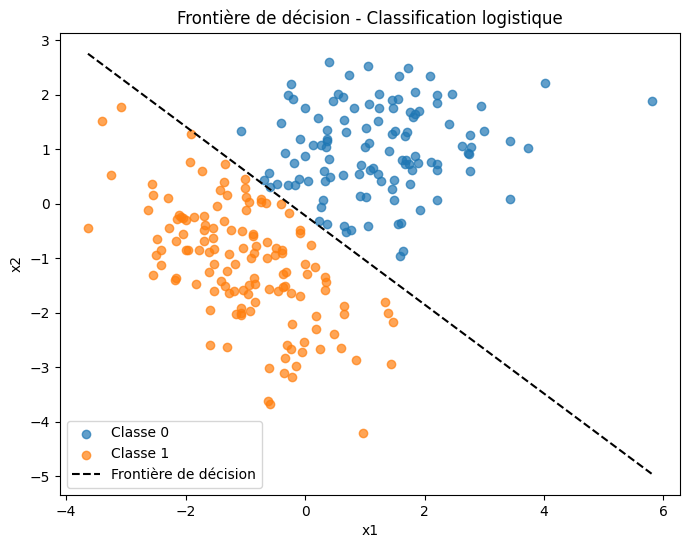

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Découpage des données en ensembles d'apprentissage et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=26)

# Apprentissage sur l'ensemble d'entraînement
log_classification.fit(x_train, y_train)

# Prédiction sur l'ensemble d'entraînement
y_train_pred = log_classification.predict(x_train)
print("Scores sur l'ensemble d'apprentissage :")
print(classification_report(y_train, y_train_pred))
print("Accuracy (train):", accuracy_score(y_train, y_train_pred))

# Prédiction sur l'ensemble de test
y_test_pred = log_classification.predict(x_test)
print("Scores sur l'ensemble de test :")
print(classification_report(y_test, y_test_pred))
print("Accuracy (test):", accuracy_score(y_test, y_test_pred))

# Affichage des frontières de décision pour train et test
plot_decision(x_train, y_train, log_classification)
plot_decision(x_test, y_test, log_classification)

Les scores de précision/recall/f1-score sont utiles pour quantifier les performances d'un classifieur, mais ils ne donnent pas de détails sur quelles erreurs sont faites. Pour cela il faut calculer la matrice de confusion avec `sklearn.metrics.confusion_matrix` et l'afficher avec `sklearn.metrics.ConfusionMatrixDisplay` (voir documentation de scikit-learn). Faites le pour les données de train et test.


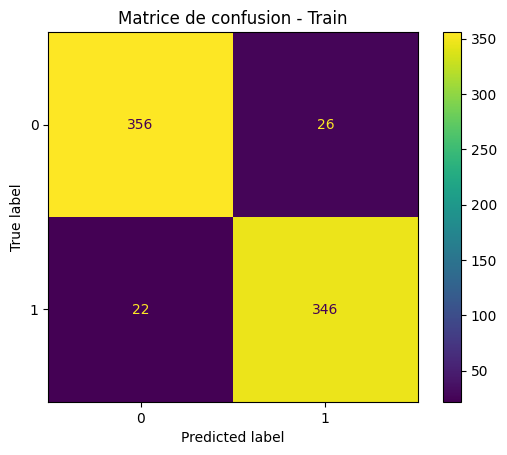

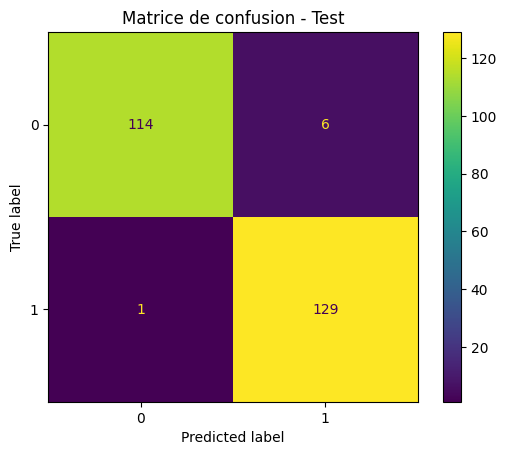

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion pour l'ensemble d'apprentissage
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title("Matrice de confusion - Train")
plt.show()

# Matrice de confusion pour l'ensemble de test
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title("Matrice de confusion - Test")
plt.show()

Grâce au découpage apprentissage/test, nous avons une meilleure idée des performances réelles de notre classifieur. Cependant, cette évaluation dépend de la manière dont est fait le découpage entre apprentissage/test. Si l'on veut une analyse plus fine, on peut faire de la validation croisée. Pour cela on fait plusieurs fois le découpage comme présenté dans la figure suivante : 

![](./image2_TP2.png "Validation croisée").

On peut voir que l'ensemble de test change à chaque fois et cela donne 5 configurations différentes (nommés folds). Utilisez `sklearn.model_selection.cross_val_score` (voir documentation à https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) pour évaluer la classification logistique sur 3 puis 5 folds. Pour chaque configuration, calculez la performance moyenne sur tous les folds. Comparez avec les performances obtenues avec un découpage fixe précédemment.

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Validation croisée avec 3 folds
scores_3fold = cross_val_score(LogisticRegression(), x_train, y[:len(x_train)], cv=3)
print("Scores (3 folds):", scores_3fold)
print("Moyenne (3 folds):", scores_3fold.mean())

# Validation croisée avec 5 folds
scores_5fold = cross_val_score(LogisticRegression(), x_train, y[:len(x_train)], cv=5)
print("Scores (5 folds):", scores_5fold)
print("Moyenne (5 folds):", scores_5fold.mean())

Scores (3 folds): [0.504 0.52  0.528]
Moyenne (3 folds): 0.5173333333333333
Scores (5 folds): [0.55333333 0.5        0.54666667 0.45333333 0.57333333]
Moyenne (5 folds): 0.5253333333333333


A vous de jouer
-----

Maintenant que vous savez exploiter la classification logistique, vous allez pouvoir la tester sur un dataset plus complexe. Nous rependrons le dataset iris vu le cours. Pour le charger, exécutez la cellule suivante

In [51]:
import pandas as pd
iris = data.load_iris(as_frame=True)
x = iris.data
y = iris.target

Pour avoir des détails sur ce dataset, exécutez les deux cellules qui suivent. Cela montre que les données d'entrée sont un vecteur de dimension 4 et que la classe à prédire est parmi 3 classes.

In [52]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
y.head(1)

0    0
Name: target, dtype: int64

In [54]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Appliquez la régression logistique sur ces données avec un découpage en train/test (sans validation croisée) et affichez les performances. Faites une évaluation en CV avec 5 fold ensuite (si besoin appliquez plus d'itérations à la classification logistique).

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Découpage train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=26)

# Régression logistique (plus d'itérations pour convergence)
logreg = LogisticRegression(max_iter=500)
logreg.fit(x_train, y_train)

# Prédictions et performances
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

print("Train classification report:")
print(classification_report(y_train, y_train_pred))
print("Test classification report:")
print(classification_report(y_test, y_test_pred))
print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.92      0.96        38
           2       0.93      1.00      0.96        37

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.98      0.97      0.97       112

Test classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Train accuracy: 0.9732142857142857
Test accuracy: 0.9736842105263158


In [56]:

# Validation croisée 5 folds
cv_scores = cross_val_score(LogisticRegression(max_iter=500), x, y, cv=5)
print("CV scores (5 folds):", cv_scores)
print("CV mean accuracy:", cv_scores.mean())

CV scores (5 folds): [0.96666667 1.         0.93333333 0.96666667 1.        ]
CV mean accuracy: 0.9733333333333334


La classification Bayésienne
---------

La classification Naïve Bayésienne (à importer avec `from sklearn.naive_bayes import GaussianNB`) a été vue en cours. Appliquez là sur le dataset iris avec le même découpage que pour la classification logistique (ne refaites pas le découpage). Comparez les performances. Quel modèle est le plus performant ?

In [57]:
from sklearn.naive_bayes import GaussianNB

# Apprentissage du classifieur Naïve Bayésien
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Prédictions
y_train_pred_nb = gnb.predict(x_train)
y_test_pred_nb = gnb.predict(x_test)

# Affichage des performances
print("Train classification report (Naïve Bayes):")
print(classification_report(y_train, y_train_pred_nb))
print("Test classification report (Naïve Bayes):")
print(classification_report(y_test, y_test_pred_nb))
print("Train accuracy (Naïve Bayes):", accuracy_score(y_train, y_train_pred_nb))
print("Test accuracy (Naïve Bayes):", accuracy_score(y_test, y_test_pred_nb))

Train classification report (Naïve Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.92      0.95      0.94        38
           2       0.94      0.92      0.93        37

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112

Test classification report (Naïve Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Train accuracy (Naïve Bayes): 0.9553571428571429
Test accuracy (Naïve Bayes): 0.9736842105263158


Nous allons explorer la classification Bayésienne avec un dataset provenant du site Kaggle (pour les data scientists) et disponible à https://www.kaggle.com/datasets/itssuru/loan-data?resource=download. 
Le fichier csv de ce dataset est fourni dans l'archive du TP.
Cet ensemble de données comprend plus de 9 500 prêts avec des informations sur la structure du prêt, l'emprunteur et si le prêt a été remboursé dans son intégralité ou non. Ces données ont été extraites de LendingClub.com, une société qui met en relation des emprunteurs avec des investisseurs. Imaginez que vous venez d'être embauché en tant que spécialiste de l'apprentissage automatique dans une startup qui souhaite automatiser les approbations de prêts. Pour votre premier projet, votre responsable aimerait que vous construisiez un classificateur Bayésien pour prédire si un prêt sera remboursé sur la base de ces données.

Avec l'aide de pandas, chargez ce dataset dans une variable nommée *loan* et affichez les premières lignes.


In [58]:
loan = pd.read_csv("loan_data.csv")
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Nous allons ensuite transformer la colonne 'purpose' car c'est une information symbolique et non numérique.

In [59]:
loan = pd.get_dummies(loan,columns=['purpose'],drop_first=True)
loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


Mettez dans un vecteur nommé x toutes les colonnes de loan sauf celle nommée 'not.fully.paid' qui contient la classe à prédire (prêt remboursé ou non). Mettez dans un vecteur nommé y le contenu de la colonne nommée 'not.fully.paid'. C'est la classe à prédire (prêt remboursé ou non). Faites comme précédemment pour apprendre sur ce dataset (split train/test) et affichage des performances, avec un classifieur Naïf Bayésien. Analysez la matrice de confusion, est-ce que le modèle est satisfaisant ?
De quoi cela peut-il venir ? Pour le comprendre regardez le nombre d'instances dans chaque classe. Cela peut se faire avec `Counter(y_train)` (à importer avec `from collections import Counter`).

Train classification report (Naïve Bayes):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6039
           1       0.32      0.09      0.15      1144

    accuracy                           0.82      7183
   macro avg       0.58      0.53      0.52      7183
weighted avg       0.76      0.82      0.78      7183

Test classification report (Naïve Bayes):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2006
           1       0.33      0.10      0.15       389

    accuracy                           0.82      2395
   macro avg       0.59      0.53      0.53      2395
weighted avg       0.76      0.82      0.78      2395

Train accuracy (Naïve Bayes): 0.8231936516775721
Test accuracy (Naïve Bayes): 0.821294363256785


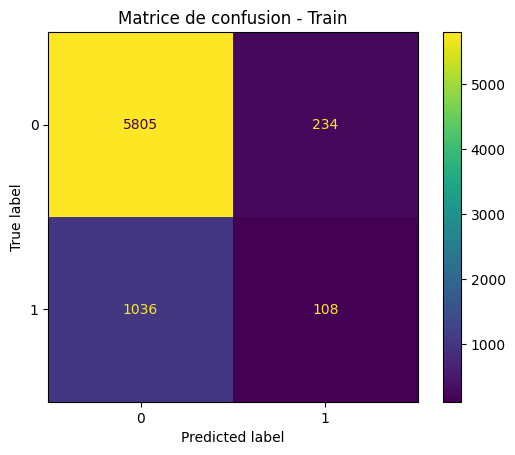

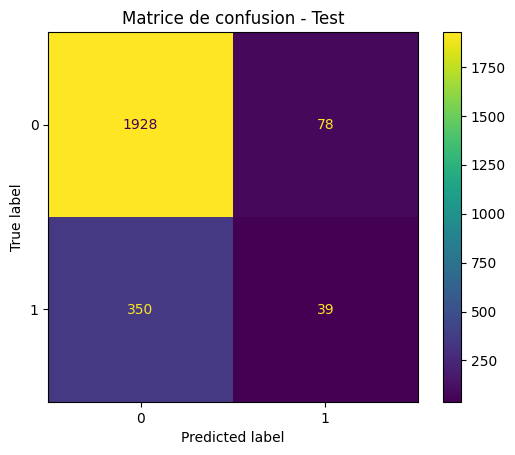

Répartition des classes dans y_train : Counter({0: 6039, 1: 1144})


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from collections import Counter

# Séparation des variables explicatives et de la cible
x = loan.drop(columns=['not.fully.paid'])
y = loan['not.fully.paid']

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=26)

# Apprentissage du classifieur Naïve Bayésien
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Prédictions
y_train_pred = gnb.predict(x_train)
y_test_pred = gnb.predict(x_test)

# Affichage des performances
print("Train classification report (Naïve Bayes):")
print(classification_report(y_train, y_train_pred))
print("Test classification report (Naïve Bayes):")
print(classification_report(y_test, y_test_pred))
print("Train accuracy (Naïve Bayes):", accuracy_score(y_train, y_train_pred))
print("Test accuracy (Naïve Bayes):", accuracy_score(y_test, y_test_pred))

# Matrice de confusion
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()
plt.title("Matrice de confusion - Train")
plt.show()
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
plt.title("Matrice de confusion - Test")
plt.show()

# Analyse du déséquilibre des classes
print("Répartition des classes dans y_train :", Counter(y_train))

Pour contrer l'aspect non balancé de la base d'apprentissage, nous pouvons utiliser un resampling synthétique qui va générer de nouvelles instances. Cela peut se faire avec `SMOTE` (`from imblearn.over_sampling import SMOTE`). Il est possible de balancer le dataset avec l'instruction `x_train_res, y_train_res = SMOTE().fit_resample(x_train, y_train)`. Cela crée un nouveau dataset `(x_train_res, y_train_res)` et a ajouté des instances à la  classe minoritaire (à vérifier avec `Counter`). Refaites un apprentissage du classifieur Bayésien sur ces données balancées et testez sur les données de test. Comparez avec les précédents résultats.

Répartition des classes après SMOTE : Counter({0: 6039, 1: 6039})
Test classification report (Naïve Bayes avec SMOTE):
              precision    recall  f1-score   support

           0       0.87      0.58      0.70      2006
           1       0.21      0.57      0.30       389

    accuracy                           0.58      2395
   macro avg       0.54      0.57      0.50      2395
weighted avg       0.77      0.58      0.63      2395

Test accuracy (Naïve Bayes avec SMOTE): 0.5774530271398748


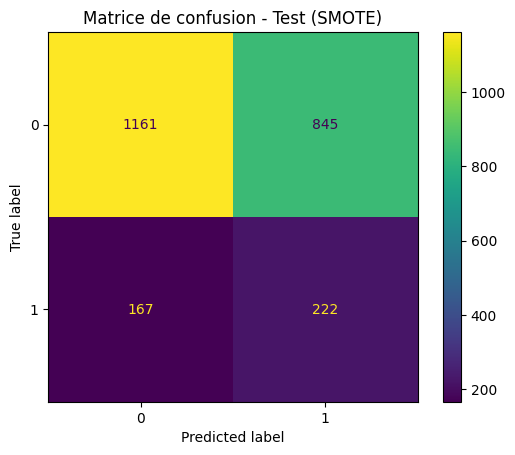

In [61]:
from imblearn.over_sampling import SMOTE

# Resampling synthétique pour équilibrer les classes
x_train_res, y_train_res = SMOTE().fit_resample(x_train, y_train)
print("Répartition des classes après SMOTE :", Counter(y_train_res))

# Apprentissage du classifieur Naïve Bayésien sur données balancées
gnb_res = GaussianNB()
gnb_res.fit(x_train_res, y_train_res)

# Prédictions sur le test set
y_test_pred_res = gnb_res.predict(x_test)

# Affichage des performances
print("Test classification report (Naïve Bayes avec SMOTE):")
print(classification_report(y_test, y_test_pred_res))
print("Test accuracy (Naïve Bayes avec SMOTE):", accuracy_score(y_test, y_test_pred_res))

# Matrice de confusion
cm_test_res = confusion_matrix(y_test, y_test_pred_res)
ConfusionMatrixDisplay(confusion_matrix=cm_test_res).plot()
plt.title("Matrice de confusion - Test (SMOTE)")
plt.show()

La classification par les k plus proches voisins
---------

La classification par les k plus proche voisins consiste, pour classer une instance $x$, à chercher les k plus proches examples de la base d'apprentissage et à affecter à $x$ la classe majoritaire. C'est un algorithme très simple, mais il faut faire attention au calcul de la distance : les attributs doivent être normalisés. Exécutez les cellules suivantes, elles montrent des illustrations du principe des kppv. Variez le nombre de voisins et constatez le résultat.

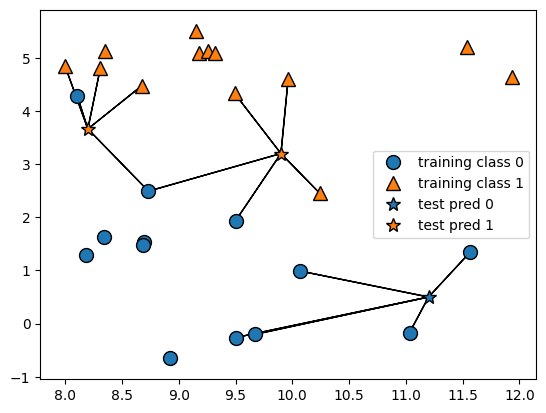

In [62]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=5)

Le classifier kppv de scikit-learn est `KNeighborsClassifier` (à importer par  `from sklearn.neighbors import KNeighborsClassifier`).
Créez un classifieur 3-ppv. Comme dans le TP précédent, créez un pipeline afin de scaler les données de x_train. Lancez et testez ce classifieur sur les données (x_train, y_train) et (x_test, y_test), comme précédemment. Affichez l'accuracy et comparez avec le précédent classifieur Bayésien. 
Faites varier (à l'aide d'une boucle) le nombre de voisins et regardez son influence.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline avec scaler et classifieur 3-ppv
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Apprentissage et prédiction
knn_pipeline.fit(x_train, y_train)
y_train_pred_knn = knn_pipeline.predict(x_train)
y_test_pred_knn = knn_pipeline.predict(x_test)

# Affichage des accuracies
print("Accuracy train (KNN 3 voisins):", accuracy_score(y_train, y_train_pred_knn))
print("Accuracy test (KNN 3 voisins):", accuracy_score(y_test, y_test_pred_knn))

# Comparaison avec Naive Bayes
nb = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
nb.fit(x_train, y_train)
y_train_pred_nb = nb.predict(x_train)
y_test_pred_nb = nb.predict(x_test)

print("Accuracy train (Naive Bayes):", accuracy_score(y_train, y_train_pred_nb))
print("Accuracy test (Naive Bayes):", accuracy_score(y_test, y_test_pred_nb))

# Comparaison avec logistic regression
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])
log_reg.fit(x_train, y_train)
y_train_pred_log_reg = log_reg.predict(x_train)
y_test_pred_log_reg = log_reg.predict(x_test)

print("Accuracy train (Logistic regression):", accuracy_score(y_train, y_train_pred_log_reg))
print("Accuracy test (Logistic regression):", accuracy_score(y_test, y_test_pred_log_reg))

# Influence du nombre de voisins
for k in range(1, 11):
    knn = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    knn.fit(x_train, y_train)
    y_test_pred_k = knn.predict(x_test)
    acc = accuracy_score(y_test, y_test_pred_k)
    print(f"Accuracy test (KNN, {k} voisins): {acc:.4f}")

Accuracy train (KNN 3 voisins): 0.8818042600584713
Accuracy test (KNN 3 voisins): 0.8
Accuracy train (Naive Bayes): 0.7737714047055548
Accuracy test (Naive Bayes): 0.7636743215031315
Accuracy train (Logistic regression): 0.8401781985242934
Accuracy test (Logistic regression): 0.837160751565762
Accuracy test (KNN, 1 voisins): 0.7574
Accuracy test (KNN, 2 voisins): 0.8276
Accuracy test (KNN, 3 voisins): 0.8000
Accuracy test (KNN, 4 voisins): 0.8280
Accuracy test (KNN, 5 voisins): 0.8205
Accuracy test (KNN, 6 voisins): 0.8330
Accuracy test (KNN, 7 voisins): 0.8234
Accuracy test (KNN, 8 voisins): 0.8322
Accuracy test (KNN, 9 voisins): 0.8309
Accuracy test (KNN, 10 voisins): 0.8351
